# Average time spent on social media 

FCSI Group 2 
<br>Hng Cherng Khai
<br>Liew Jia Wei
<br>Joyce Lee Jia Xuan



***

## Essential Libraries

In [96]:
pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


***

## Import the Dataset

In [98]:
data = pd.read_csv("dataset.csv")
data.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


Description of the dataset, as available on Kaggle, is as follows
<br>https://www.kaggle.com/datasets/imyjoshua/average-time-spent-by-a-user-on-social-media/data

> **age**: Age of the user  
> **gender**: Gender of the user  
> **time_spent**: Average time spent by a user on social media (in hours)  
> **platform**: Social media platform used by the user  
> **interests**: Interests of the user  
> **location**: Location of the user  
> **demographics**: Additional demographic information of the user  
> **profession**: Profession or occupation of the user  
> **income**: Income level of the user  
> **indebt**: Indicator of whether the user is in debt (Yes/No)  
> **isHomeOwner**: Indicator of whether the user owns a home (Yes/No)  
> **Owns_Car**: Indicator of whether the user owns a car (Yes/No)


In [99]:
print("Data type : ", type(data))
print("Data dimensions : ", data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dimensions :  (1000, 12)


In [100]:
print(data.dtypes)

age              int64
gender          object
time_spent       int64
platform        object
interests       object
location        object
demographics    object
profession      object
income           int64
indebt            bool
isHomeOwner       bool
Owns_Car          bool
dtype: object


In [101]:
data.isnull().sum()

age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64

In [102]:
bins = [1, 2, 3, 4 ,5 ,6 ,7 ,8, 9, np.inf]
names = ['low','low','low','low','high','high','high','high','high' ]

data['time_spent_category'] = pd.cut(data['time_spent'], bins, labels=names,right=False, ordered=False)

print(data.dtypes)


age                       int64
gender                   object
time_spent                int64
platform                 object
interests                object
location                 object
demographics             object
profession               object
income                    int64
indebt                     bool
isHomeOwner                bool
Owns_Car                   bool
time_spent_category    category
dtype: object


***

## Uni-Variate Statistics

Extract single variable

In [103]:
timespent = pd.DataFrame(data['time_spent_category'])
age = pd.DataFrame(data['age'])
gender = pd.DataFrame(data['gender'])
platform = pd.DataFrame(data['platform'])
profession = pd.DataFrame(data['profession'])
income = pd.DataFrame(data['income'])
interests = pd.DataFrame(data['interests'])


Numerical Variable Statistic

In [104]:
age.describe()

,age
count,1000.000000
mean,40.986000
std,13.497852
min,18.000000
25%,29.000000
50%,42.000000
75%,52.000000
max,64.000000


<Axes: >

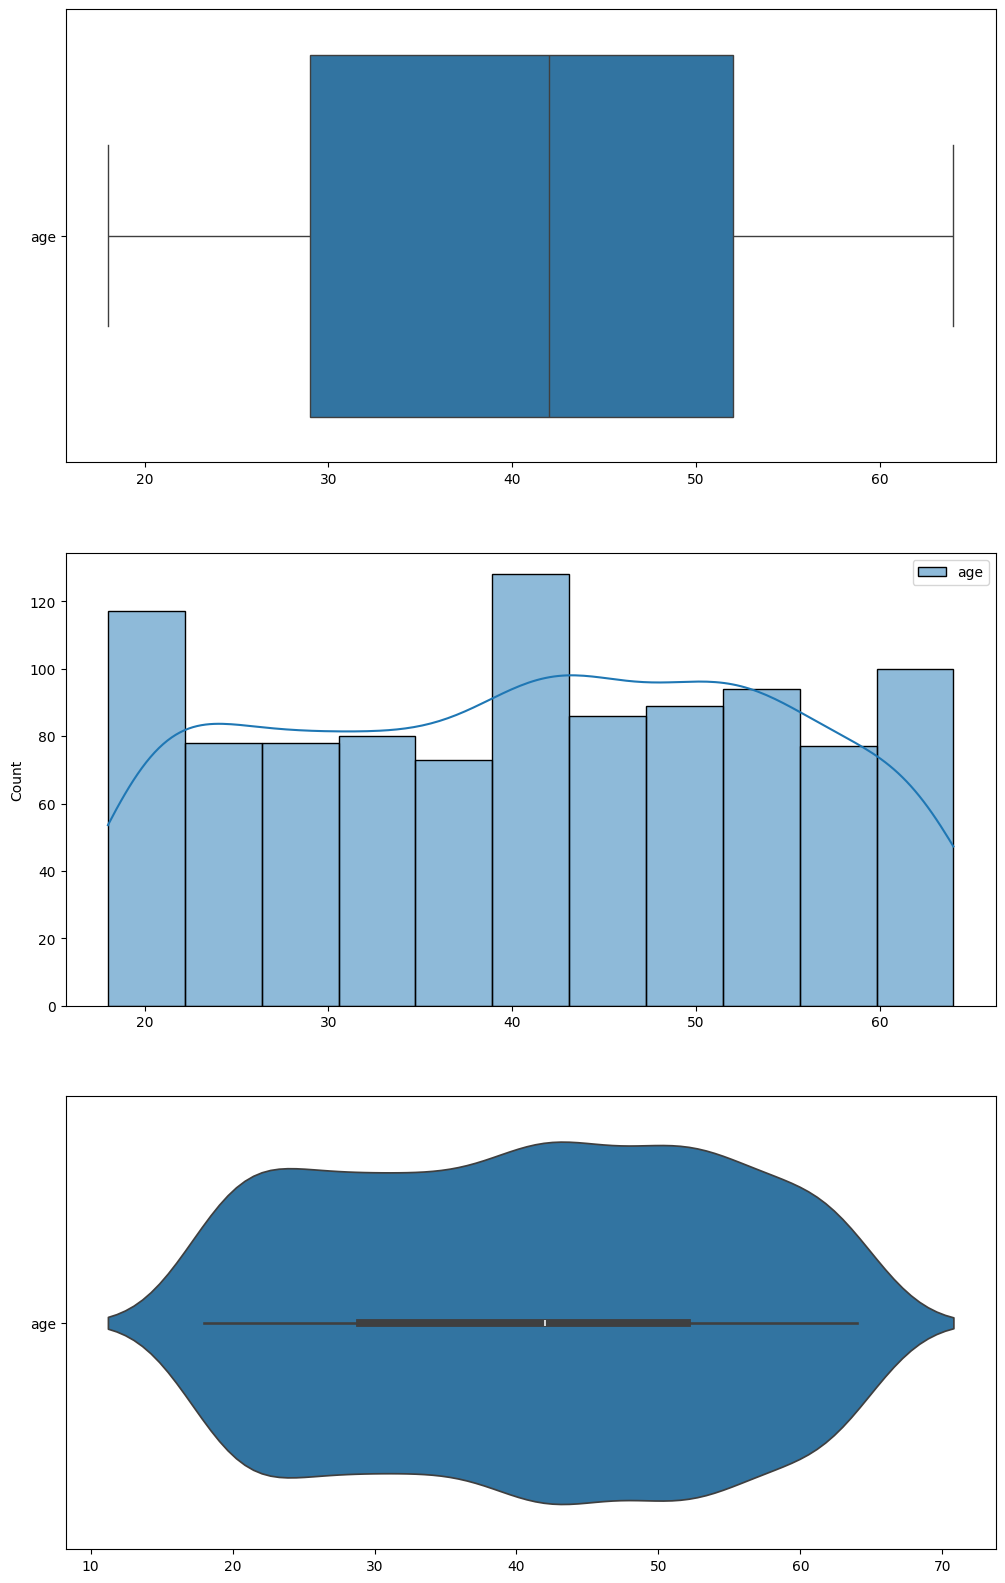

In [105]:
f, axes = plt.subplots(3, 1, figsize= (12, 20))

sb.boxplot(data = age, orient = "h", ax = axes[0])
sb.histplot(data = age, ax = axes[1], kde = True)
sb.violinplot(data = age, orient = "h", ax = axes[2])

In [106]:
income.describe()

,income
count,1000.000000
mean,15014.823000
std,2958.628221
min,10012.000000
25%,12402.250000
50%,14904.500000
75%,17674.250000
max,19980.000000


<Axes: >

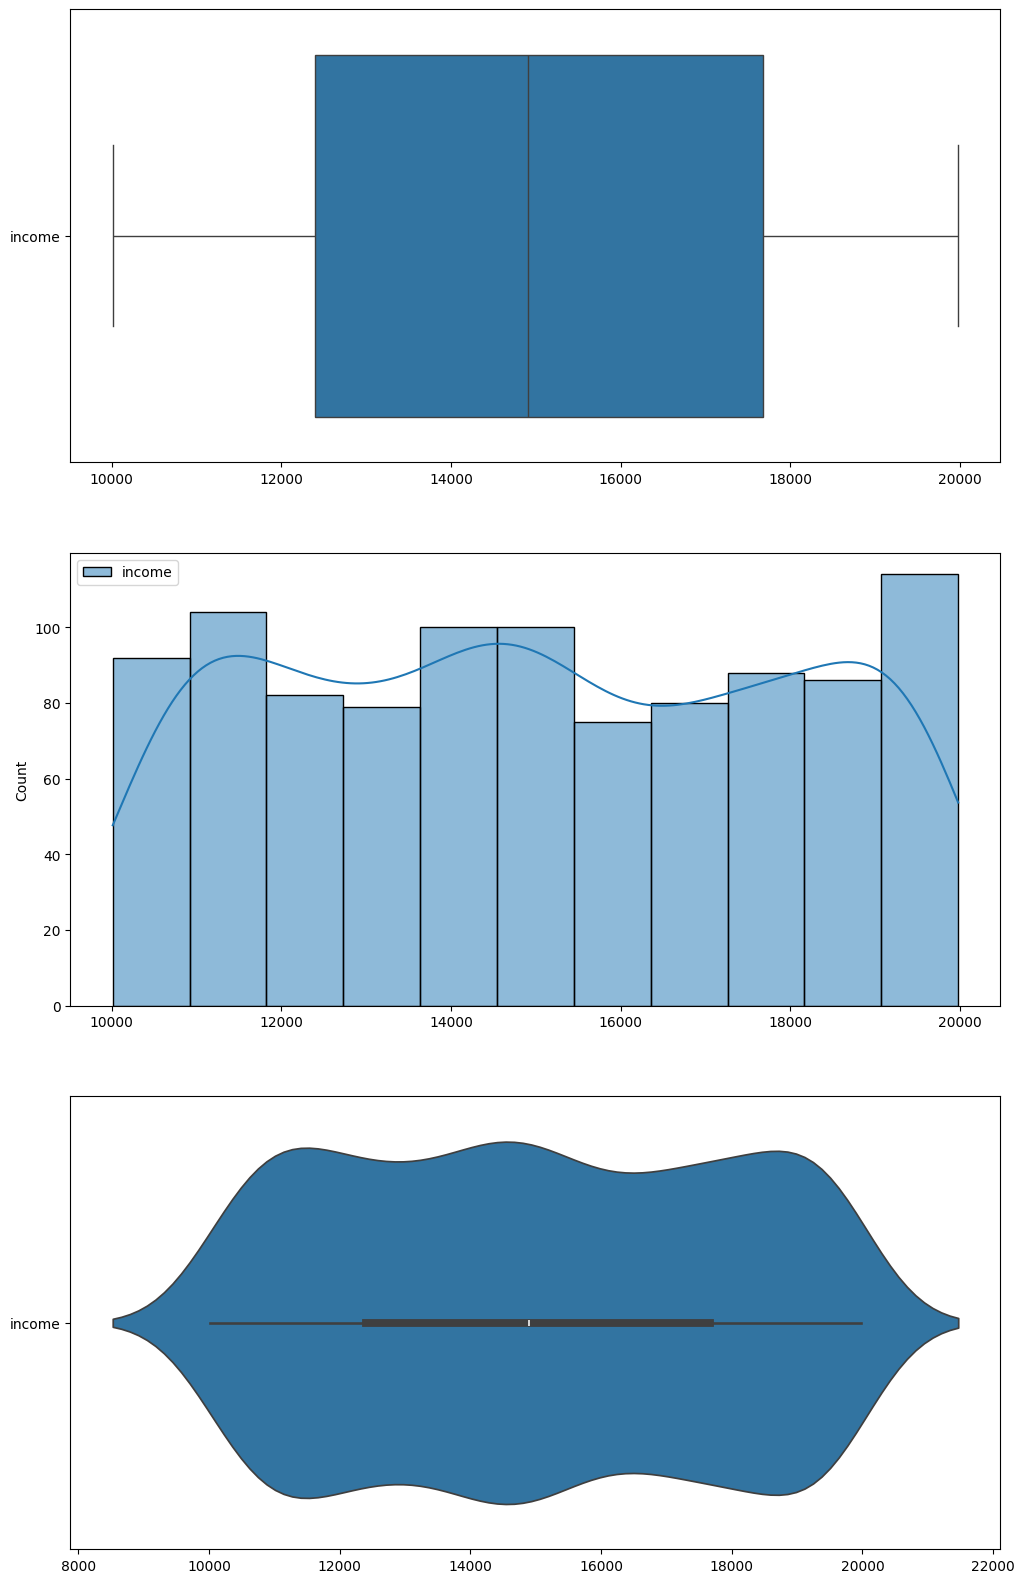

In [107]:
f, axes = plt.subplots(3, 1, figsize= (12, 20))

sb.boxplot(data = income, orient = "h", ax = axes[0])
sb.histplot(data = income, ax = axes[1], kde = True)
sb.violinplot(data = income, orient = "h", ax = axes[2])

Categorical Variable Statistic

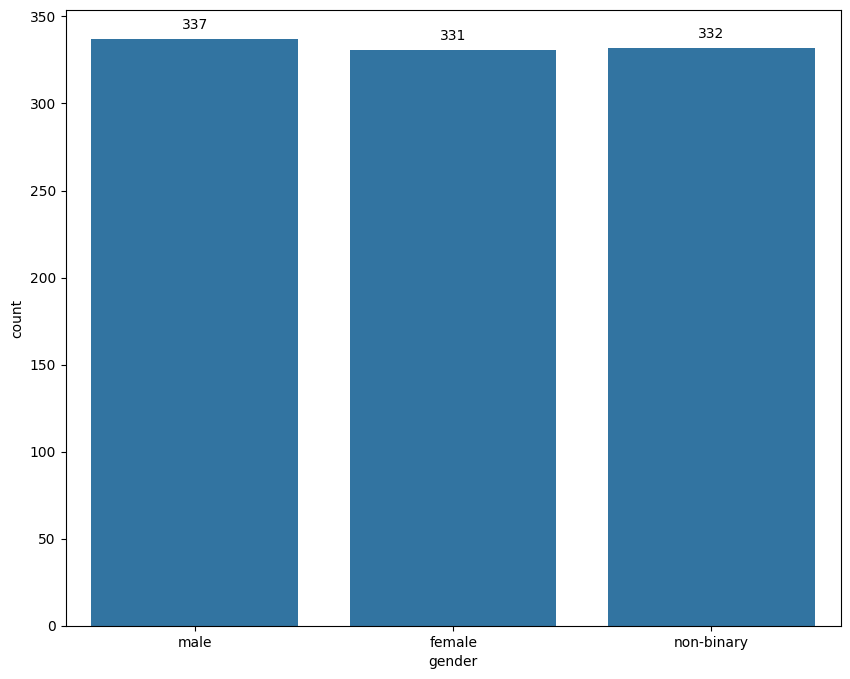

In [108]:
f, axes = plt.subplots(1, 1, figsize=(10, 8))
gender_plot = sb.countplot(x="gender", data=gender)
for p in gender_plot.patches:
    gender_plot.annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', 
                         va = 'center', 
                         xytext = (0, 10), 
                         textcoords = 'offset points')


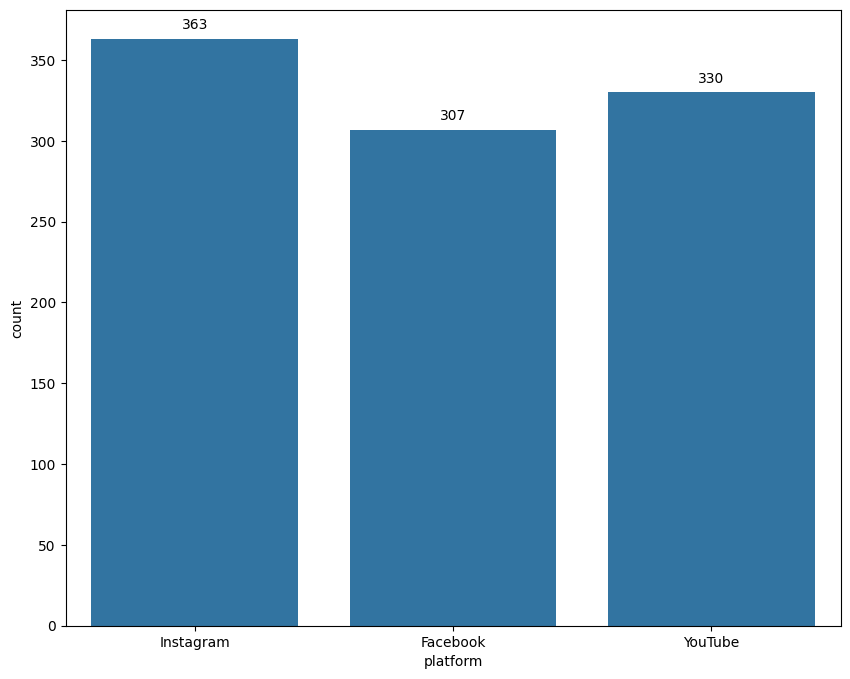

In [109]:
f, axes = plt.subplots(1, 1, figsize=(10, 8))
platform_plot = sb.countplot(x="platform", data=platform)
for p in platform_plot.patches:
    platform_plot.annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', 
                         va = 'center', 
                         xytext = (0, 10), 
                         textcoords = 'offset points')


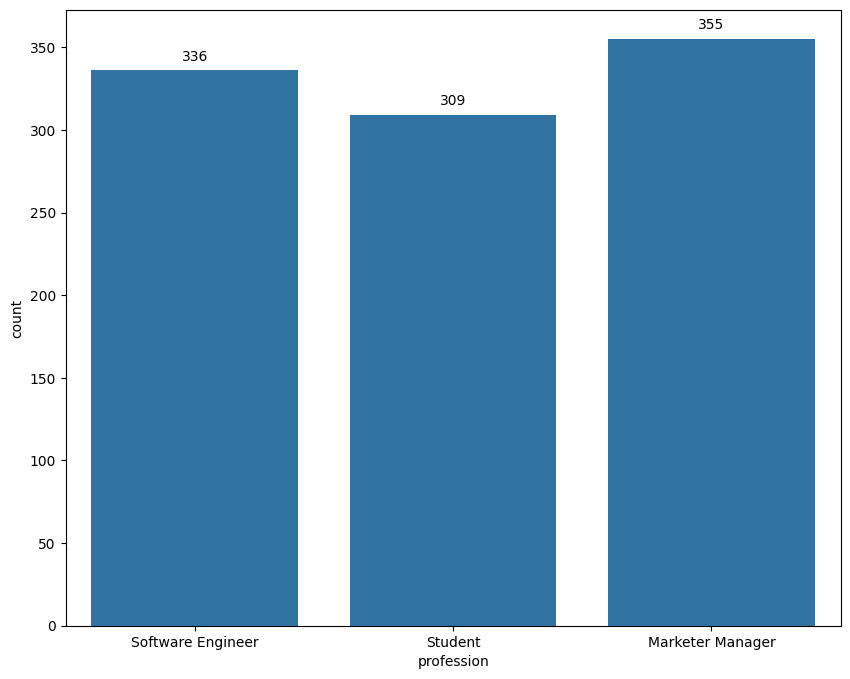

In [110]:
f, axes = plt.subplots(1, 1, figsize=(10, 8))
profession_plot = sb.countplot(x="profession", data=profession)
for p in profession_plot.patches:
    profession_plot.annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', 
                         va = 'center', 
                         xytext = (0, 10), 
                         textcoords = 'offset points')


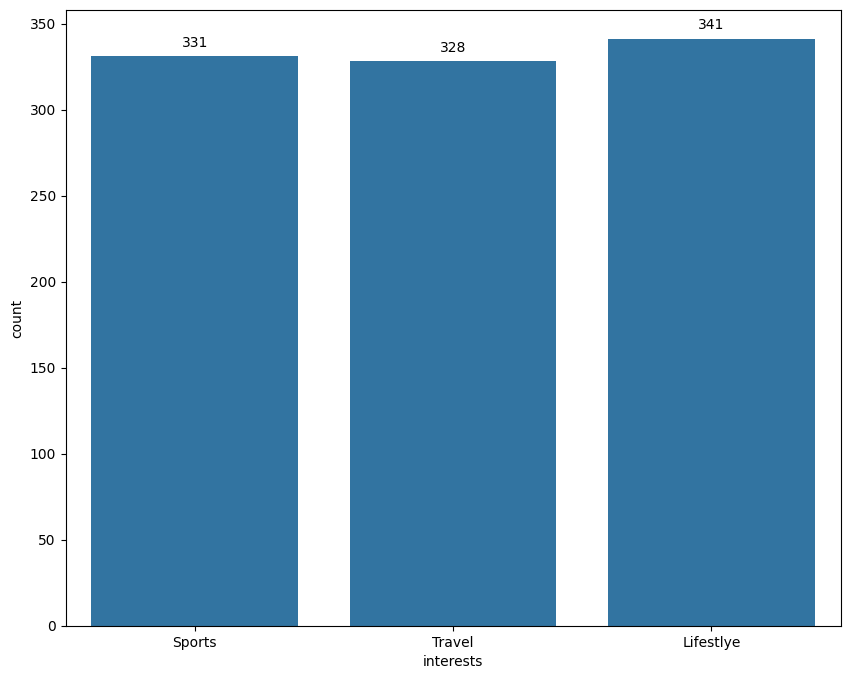

In [111]:
f, axes = plt.subplots(figsize=(10, 8))
interests_plot = sb.countplot(x="interests", data=interests)
for p in interests_plot.patches:
    interests_plot.annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', 
                         va = 'center', 
                         xytext = (0, 10), 
                         textcoords = 'offset points')


# Bivariant statistic

## Relationship with Time Spent on Social Media

<Axes: xlabel='time_spent_category', ylabel='age'>

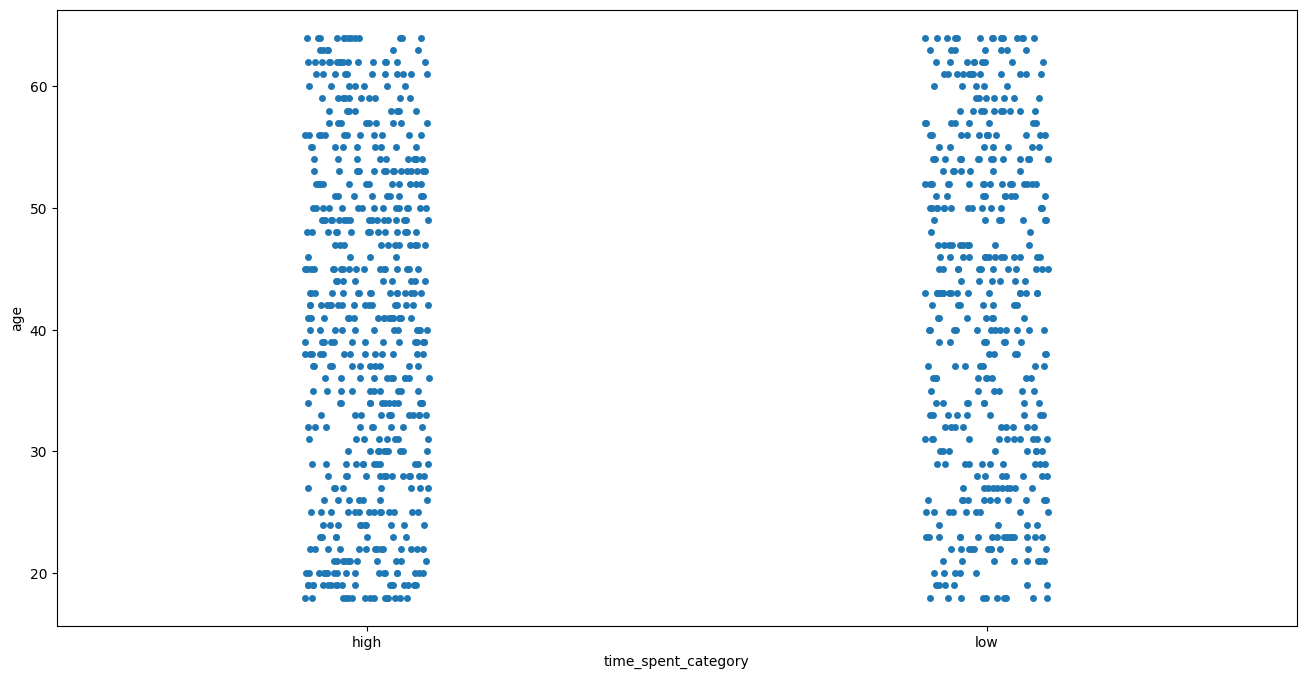

In [125]:
#Time spent vs age
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'time_spent_category', y = 'age', data = data)

<Axes: xlabel='time_spent', ylabel='income'>

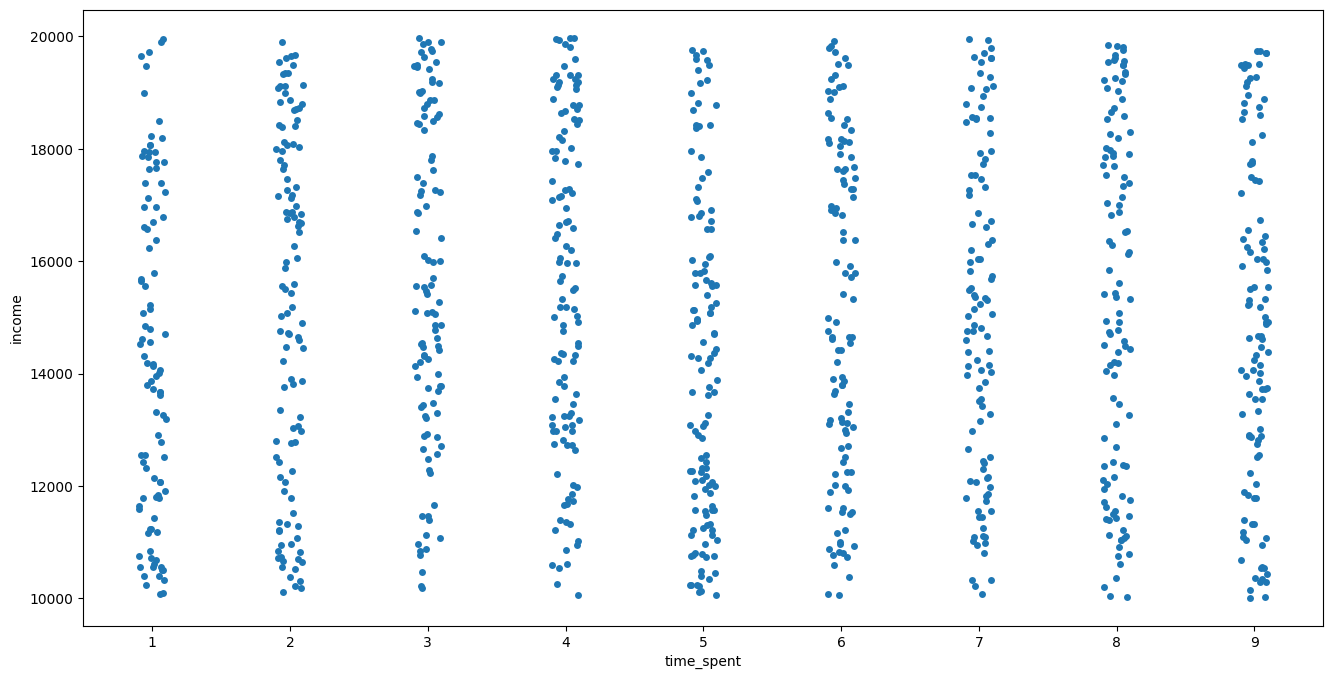

In [113]:
#Time spent vs income
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'time_spent', y = 'income', data = data)

<Axes: xlabel='time_spent_category', ylabel='gender'>

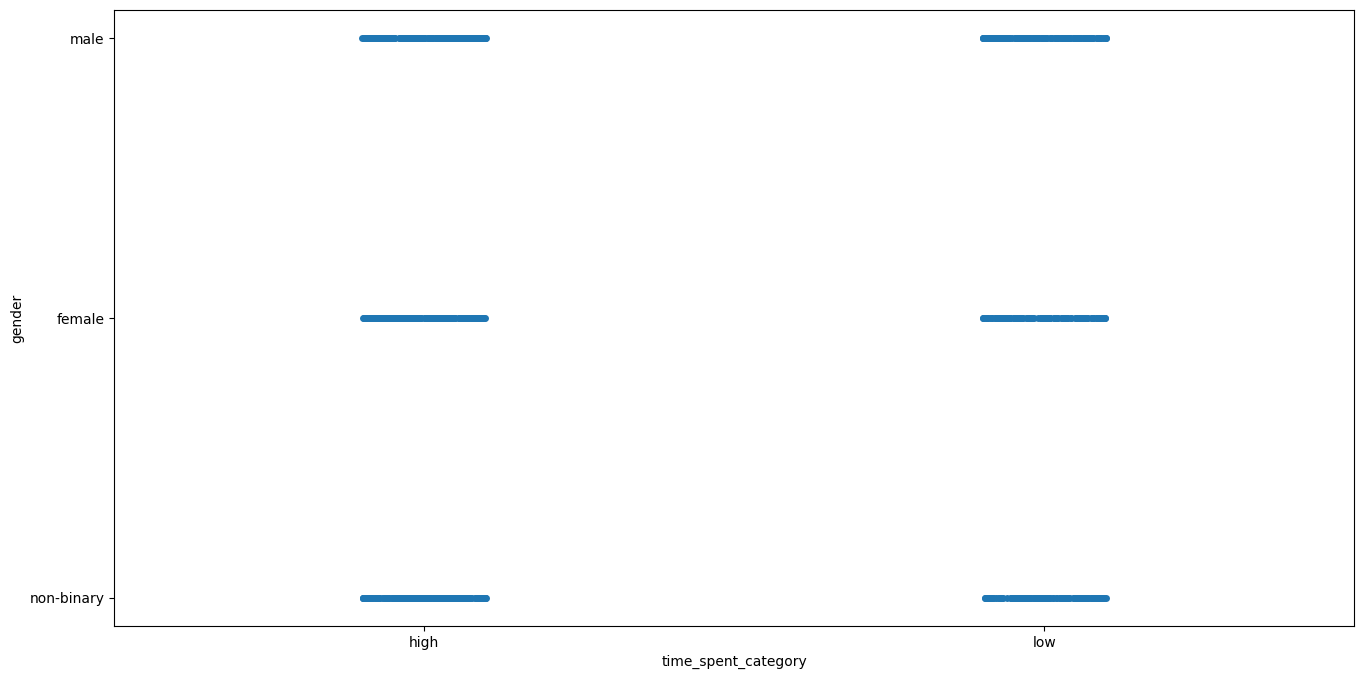

In [126]:
#Time spent vs gender
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'time_spent_category', y = 'gender', data = data)

<Axes: xlabel='time_spent_category', ylabel='platform'>

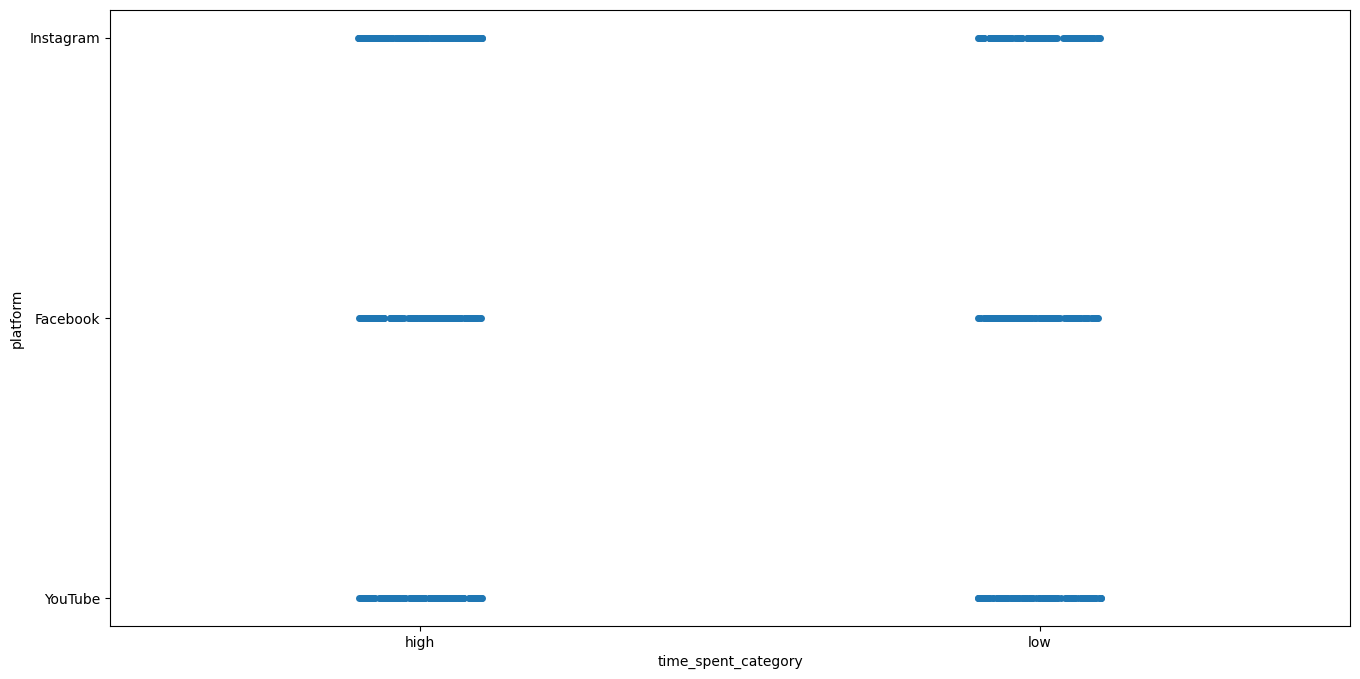

In [127]:
#Time spent vs platform
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'time_spent_category', y = 'platform', data = data)

<Axes: xlabel='time_spent_category', ylabel='profession'>

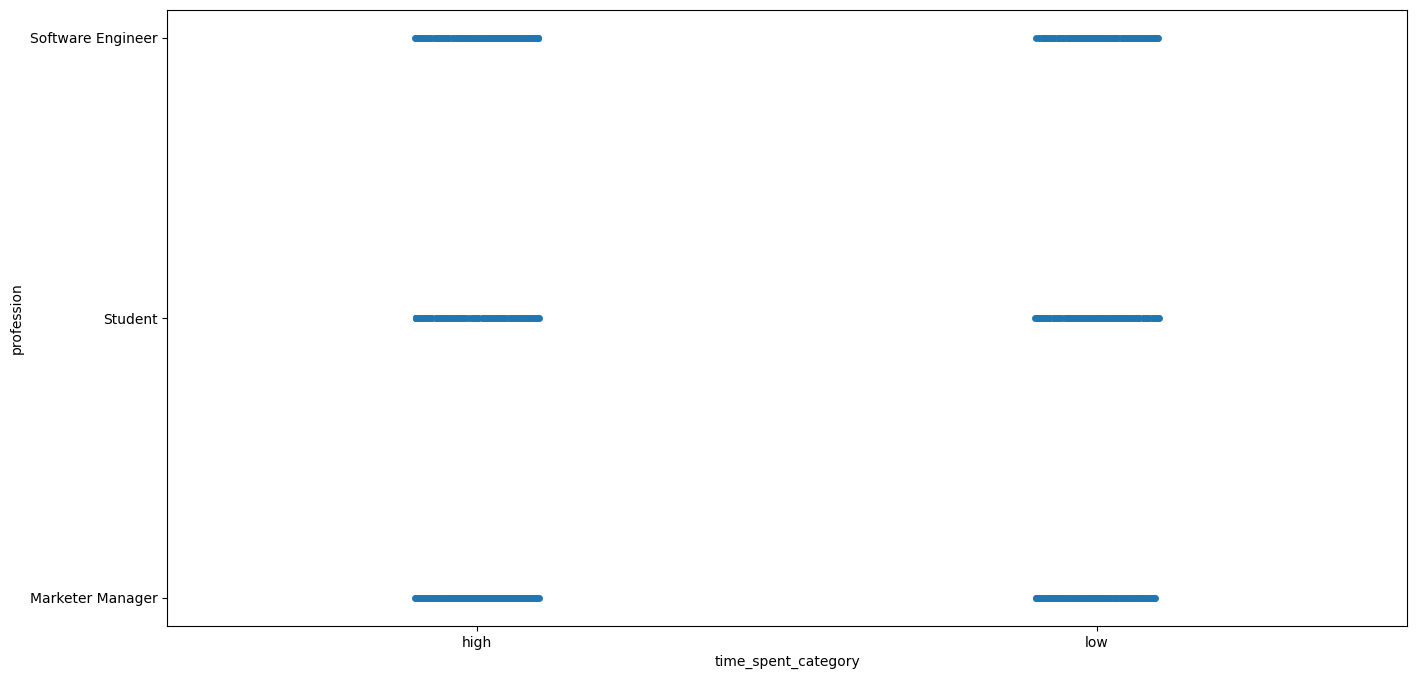

In [128]:
#Time spent vs profession
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'time_spent_category', y = 'profession', data = data)

<Axes: xlabel='time_spent_category', ylabel='interests'>

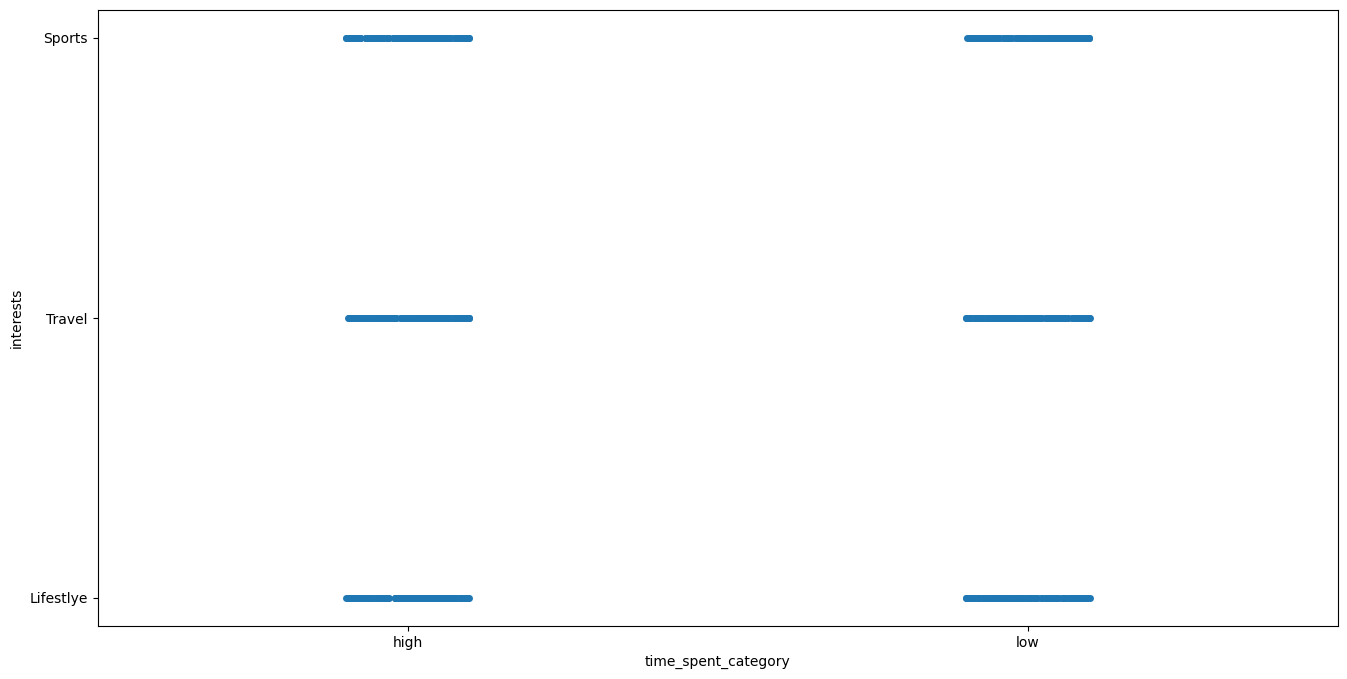

In [129]:
#Time spent vs interests
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'time_spent_category', y = 'interests', data = data)

# Heatmap between timespent and cetegorical variable

<Axes: xlabel='gender', ylabel='time_spent_category'>

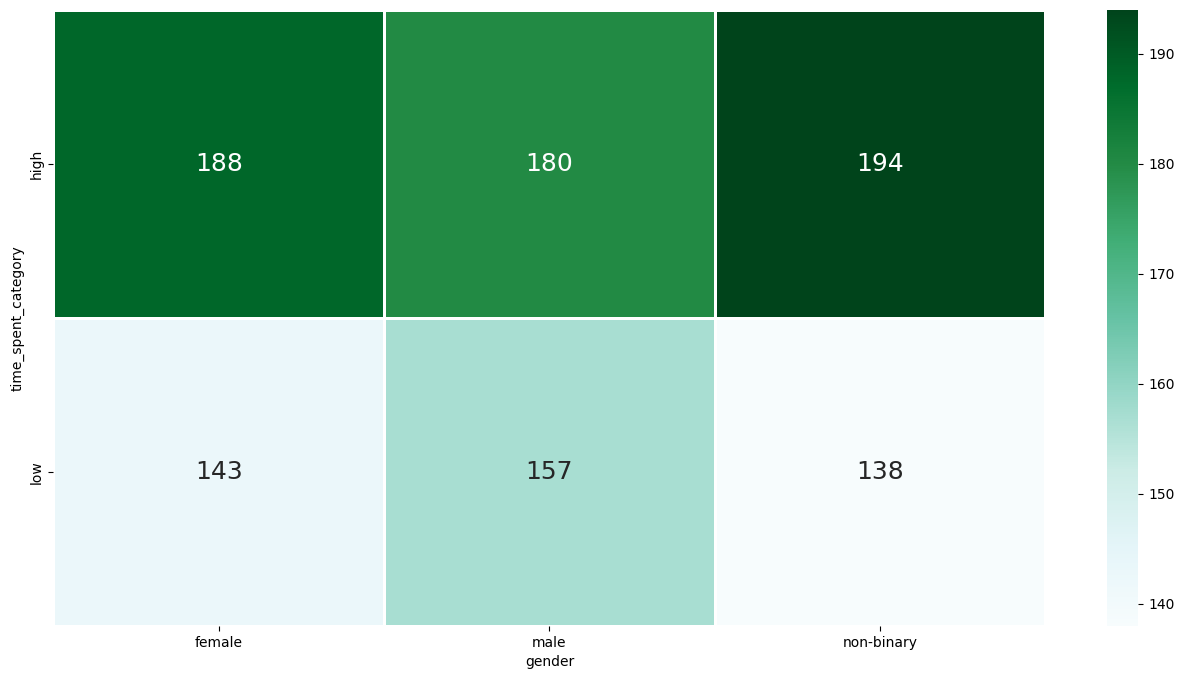

In [130]:
# timespent vs gender
f = plt.figure(figsize=(16, 8))
sb.heatmap(data.groupby(['time_spent_category', 'gender']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='platform', ylabel='time_spent_category'>

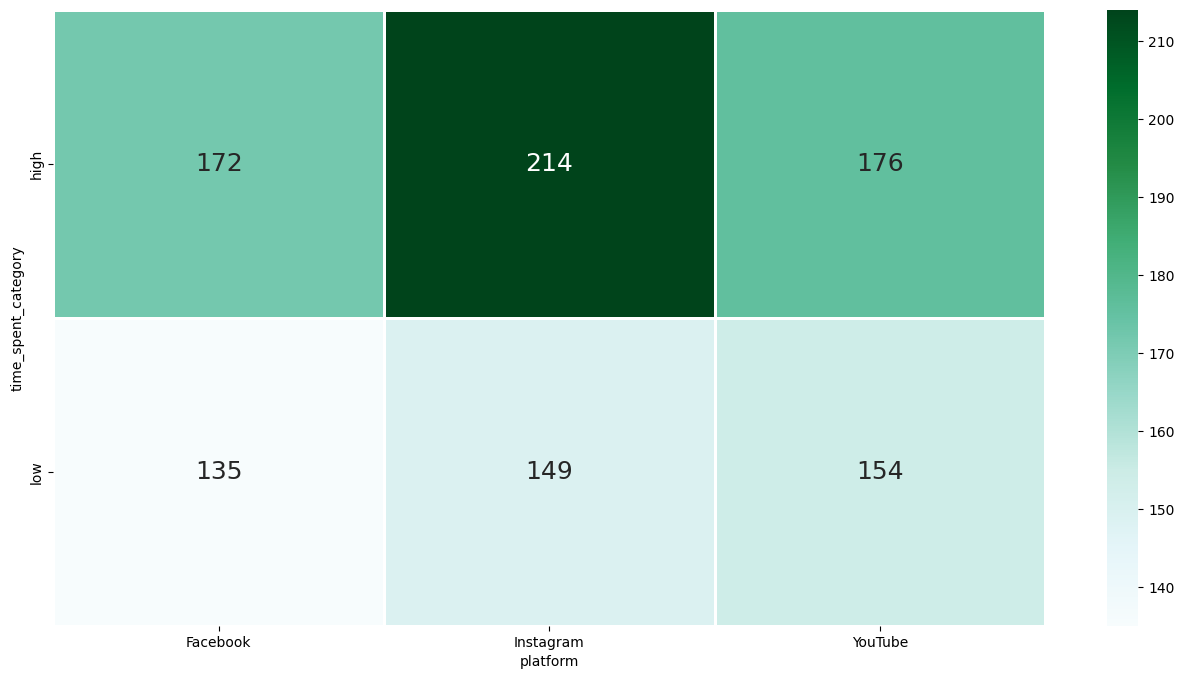

In [131]:
# timespent vs platform
f = plt.figure(figsize=(16, 8))
sb.heatmap(data.groupby(['time_spent_category', 'platform']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='profession', ylabel='time_spent_category'>

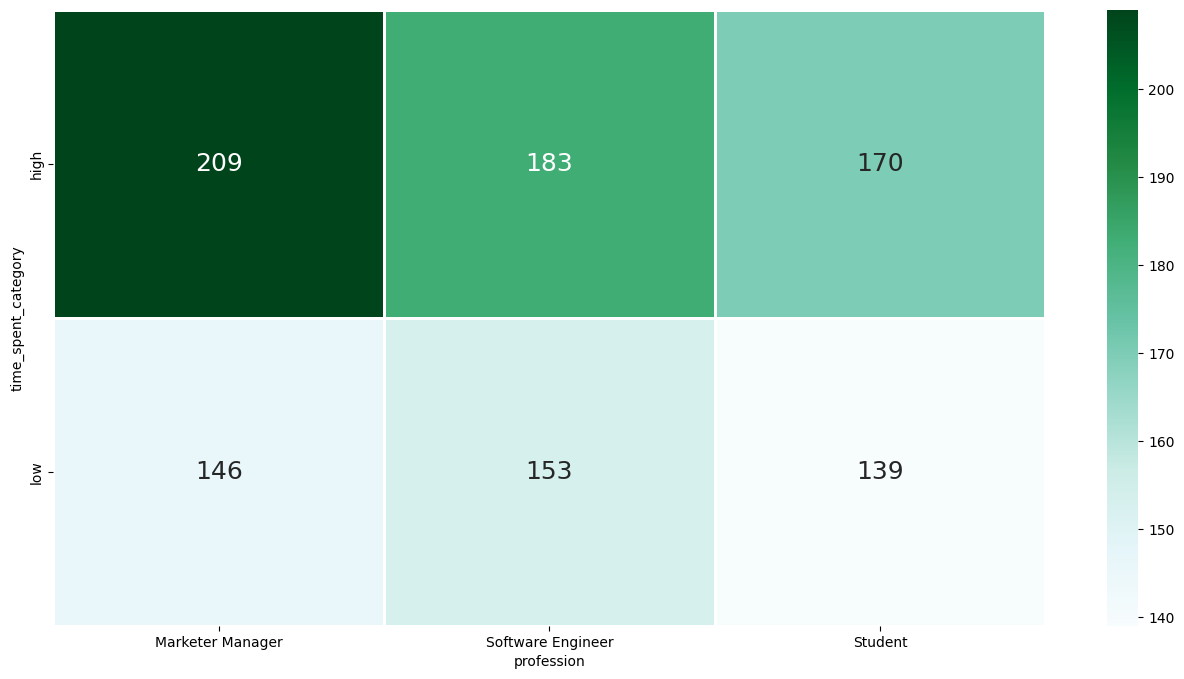

In [132]:
# timespent vs profession
f = plt.figure(figsize=(16, 8))
sb.heatmap(data.groupby(['time_spent_category', 'profession']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='interests', ylabel='time_spent_category'>

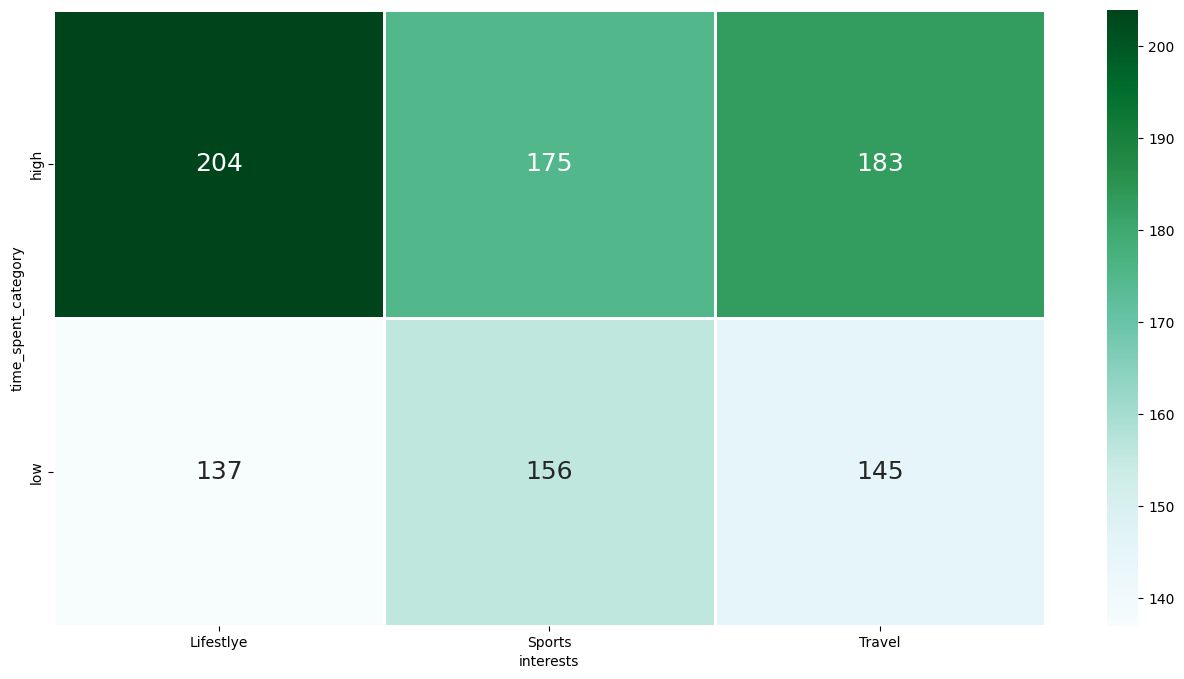

In [133]:
# timespent vs interests
f = plt.figure(figsize=(16, 8))
sb.heatmap(data.groupby(['time_spent_category', 'interests']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")